# **Credit Card Fraud Detection**

![Imgur](https://i.imgur.com/SrncNTD.jpg)
<p align="center">
<a href='https://www.freepik.com/free-photos-vectors/design'>Design vector created by macrovector - www.freepik.com</a>
</p>


Credit card fraud is a big problem in the modern world. In the United States, for instance, over [80% of the population](https://) have at least one credit card. Such a great number also means great room for fraud. But this is not only a United States problem. In Brazil, over [12 million people](https://extra.globo.com/noticias/economia/fraudes-financeiras-geraram-um-prejuizo-de-cerca-de-18-bilhao-em-12-meses-23908141.html) were the victim of credit card fraud only in 2019.

In this project, we'll work with fraud detection using a [Kaggle dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) that contains transactions made by credit cards in September 2013 by European cardholders. This data presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. Therefore it is highly unbalanced as the positive class (frauds) account for 0.172% of all transactions. Also, it contains only numerical input variables which are the result of a PCA transformation. The only features which have not been transformed with PCA are 'Time' and 'Amount'.  Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The goal of this project is to create machine learning models that efficiently identify credit card frauds based on the data we have. For that, we'll go through the following steps:

* Exploratory data analysis;
* Data preparation;
* Train, test, and evaluate the models.

# **Exploratory Data Analysis**

We'll begin by importing:
* `pandas` for data manipulation;
* `numpy` for general manipulation of numbers and arrays ;
* `matplotlib` and `seaborn` for data visualization;
* Some `scikit-learn` classes and functions to:

  * Prepare the data;
  * Create the models;
  * Evaluate the models.

* The `RandomUnderSampler` class to balance the dataset.

With that done, we'll configure the notebook, read the dataset into a dataframe, and display its first five rows.

In [2]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz

from imblearn.under_sampling import RandomUnderSampler

from IPython.display import Image  
import pydotplus

# Configuring the notebook
sns.set()
%matplotlib inline

# Reading the data
credit_card = pd.read_csv('/content/drive/My Drive/Colab Notebooks/creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Now let's use the `info` method to learn more about the data we're working with.

In [3]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We now know:

The dataset is constituted of 284,807 rows and 31 columns;
* There are no missing values;
* All the columns contain only numeric values.
* `Time` and `Amount` are the only two features that have not been transformed. `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature `Amount` is the transaction Amount.

Let's take a closer look at these two columns.

In [4]:
credit_card[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Both these columns contain a wide range of values, going from to zero to dozen of thousands. The values seem to be better distributed in the `Time` columns. Let's plot histograms for both theses features considering the `Class` column, which represents the frauds.

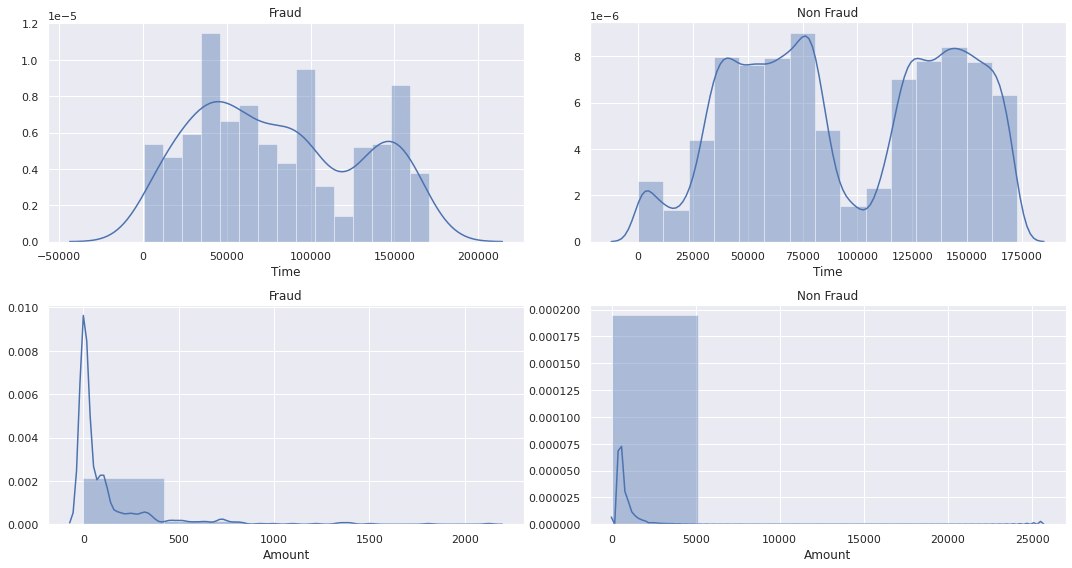

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
sns.distplot(credit_card['Time'][credit_card['Class'] == 1], bins=15, ax=ax1)
sns.distplot(credit_card['Time'][credit_card['Class'] == 0], bins=15, ax=ax2)

sns.distplot(credit_card['Amount'][credit_card['Class'] == 1], bins=5, ax=ax3)
sns.distplot(credit_card['Amount'][credit_card['Class'] == 0], bins=5, ax=ax4)

ax1.set_title('Fraud')
ax2.set_title('Non Fraud')
ax3.set_title('Fraud')
ax4.set_title('Non Fraud')
plt.tight_layout()
plt.show()

We can now confirm that the `Amount` column is better distributed than the `Time` column.

We'll now see the boxplots for the `Amount` column considering fraud and non-fraud.

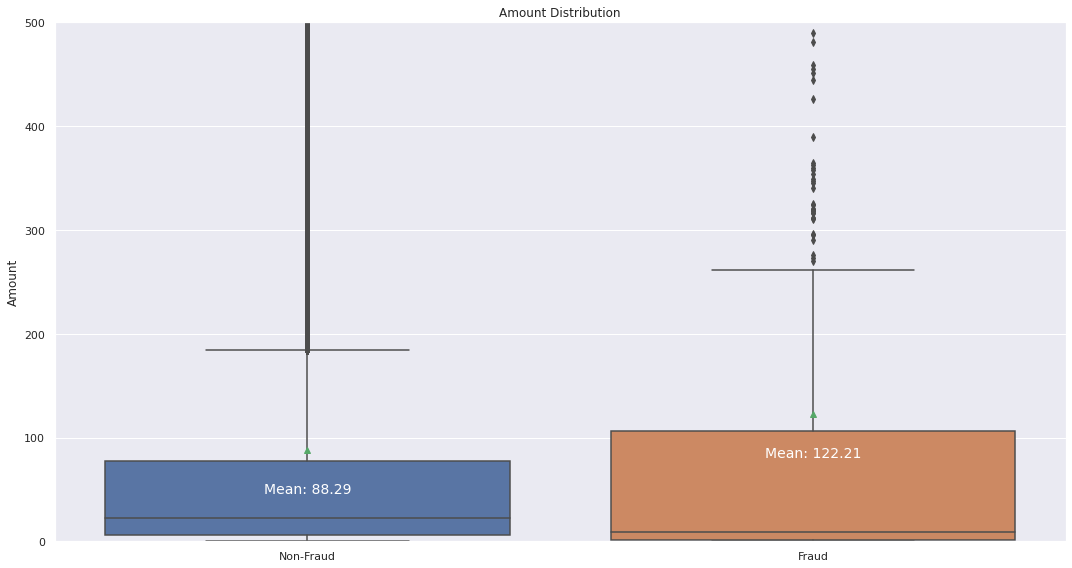

In [6]:
fig, ax = plt.subplots(figsize=(15,8))

box_plot = sns.boxplot(credit_card['Class'], credit_card['Amount'], showmeans=True, ax=ax)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
ax.set_ylim(0, 500)
ax.set_title('Amount Distribution')
ax.set_xlabel('')

means = credit_card.groupby(['Class'])['Amount'].mean()
vertical_offset = credit_card['Amount'].mean() - 130 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick] + vertical_offset, f'Mean: {round(means[xtick], 2)}', 
            horizontalalignment='center', fontsize=14, color='w')

plt.tight_layout()
plt.show()

The mean is considerably higher when there is a fraud. Also, there are plenty of outliers in both scenarios.

We'll now create a correlation heatmap for all the variables in the dataset.

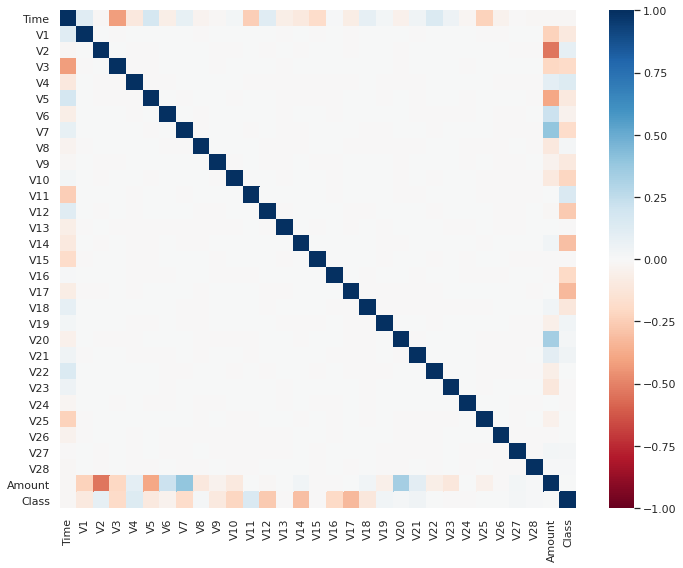

In [7]:
corr = credit_card.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu', vmin=-1)

plt.tight_layout()
plt.show()

We cannot see much correlation between the variables.

## **Preparing the Dataset**
We already know this dataset is not balanced. Let's take a look at this balance before we fix it. We also need to:

* Transform the `Time` and `Amount` columns;
* Split the dataset into train and test;

0    0.998273
1    0.001727
Name: Class, dtype: float64


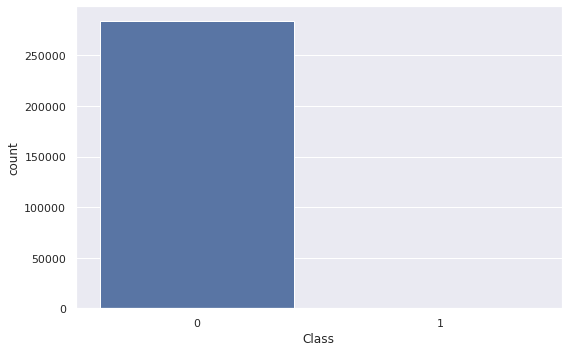

In [8]:
print(credit_card['Class'].value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(credit_card['Class'])

plt.tight_layout()
plt.show()

We can see a disproportionate ratio of observations in each class, which is not good for machine learning models' accuracy.

But before we balance the dataset, let's first transform the `Time` and `Amount` columns using the `StandardScaler` class.

In [9]:
scaler = StandardScaler()

credit_card['std_amount'] = scaler.fit_transform(credit_card['Amount'].values.reshape(-1, 1))
credit_card['std_time'] = scaler.fit_transform(credit_card['Time'].values.reshape(-1, 1))

credit_card.drop(['Amount', 'Time'], axis=1, inplace=True)

credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541



With the values transformed, let's split the dataset using `train_test_split`.

In [10]:
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now let's use the `RandomUnderSampler` class to balance `X_train` and `y_train`. We'll then see the result of this.




1    0.5
0    0.5
dtype: float64


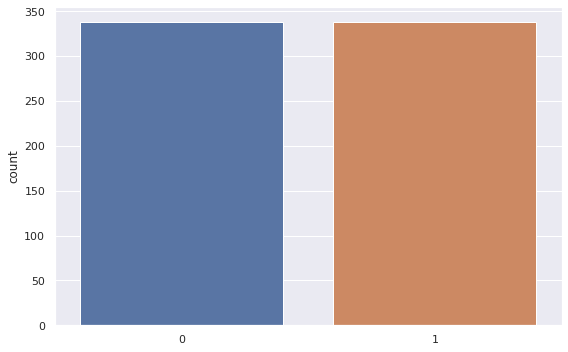

In [11]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

print(pd.Series(y_rus).value_counts(normalize=True))

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y_rus)

plt.tight_layout()
plt.show()

Now that the dataset in properly balanced, we'll compare the heatmap we created before with anew heatmap created from the balanced data.

# **Machine Learning Models**

We'll create three different machine learning models using the following algorithms:
* Logistic Regression;
* Decision Trees;
* K-nearest Neighbors.

We'll talk about each of these later on. First, let's see the metrics we'll use to evaluate the models.

## **Metrics**

To better understand the metrics, we first have to understand the possible results of the model:

* True positive (TP):

* False-negative (FN):

* False-positive (FP):

* True negative (TN):

With these concepts, we can understand four metrics: accuracy, precision, recall, and the F-1 score.

### **Accuracy**

[Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification) is the easir metric to understand. It shows the correct answer ratio and it is calculated divding the correct answer by the total number of answers:

$$
 \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}
$$

Accuracy does not handle unbalanced data well, and that's one of the reasons we balanced the dataset.

### **Precision**

[Precision](https://en.wikipedia.org/wiki/Precision_and_recall#Precision) shows the proportion of true positives, with its value ranging from zero to one.

$$
\frac{TP}{TP+FP}
$$

A precision of 0.5, for instance, says that the model is correct half of the times it identifies a fraud.

### **Recall**

In this case, the [Recall](https://en.wikipedia.org/wiki/Precision_and_recall#Recall) reveals the proportion of frauds identified correctly by the total number of frauds.

$$
\frac{TP}{TP+FN}
$$


### **F-1 Score**
The [F1-Score](https://en.wikipedia.org/wiki/F1_score) is the [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) between the Precision and the Recall. Its value ranges from zero to one and it is calculated with the following formula:
$$
2* \frac{precision*recall}{precision+recall}
$$

### **Confusion Matrix**

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is not a metric, but a table layout that allows visualization of the performance of an algorithm. In the matrix, each row represents the instances in a predicted class while each column represents the instances in an actual class. There will be a confusion matrix to help the evaluation of each model.

Example of a confusion matrix:

![](https://miro.medium.com/max/1780/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg)

## **Models**

### **Logistic Regression**

[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) is a statistical model used to model a binary dependent variable.  The method receives this name because it uses the logistic or sigmoid function as an activation function to generate results between 0 and 1, which are understood as the probability of the event occurring and used to predict a categorical variable.

Below we can see the sigmoid function:

![alt text](http://computacaointeligente.com.br/assets/img/posts/covid-19/sigmoid.png)


We'll now train, test, and evaluate a logistic regression model using the metrics previously introduced.

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85289
           1       0.03      0.92      0.06       154

    accuracy                           0.95     85443
   macro avg       0.52      0.94      0.52     85443
weighted avg       1.00      0.95      0.97     85443



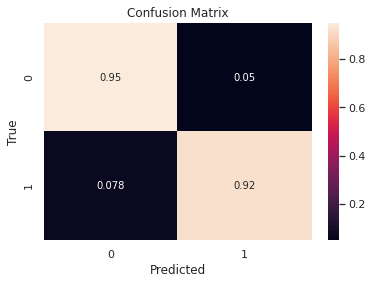

In [12]:
log_reg = LogisticRegression()

log_reg.fit(X_rus, y_rus)

y_pred_log = log_reg.predict(X_test)

def report(pred):
    print(classification_report(y_test, pred))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, pred, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()


report(y_pred_log)

## **Decision Trees**

A [decision tree](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052) model uses a uses a tree-like model of decisions to go from observations about an item (represented in the branches) to conclusions about the item's target value.

It works by splitting the data by its variables and grouping together the similar rows in the dataset. The following image shows a decision tree used  in famous Kaggle challenge [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). 

![alt text](https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg)

Setting the maximum depth of the tree is important to avoid problems like overfitting. In order to find the best possible depth for the tree, we'll create models with a range of different depths and then see which one provided the best result. We'll then use this best depth to create and evaluate the final decision tree model.

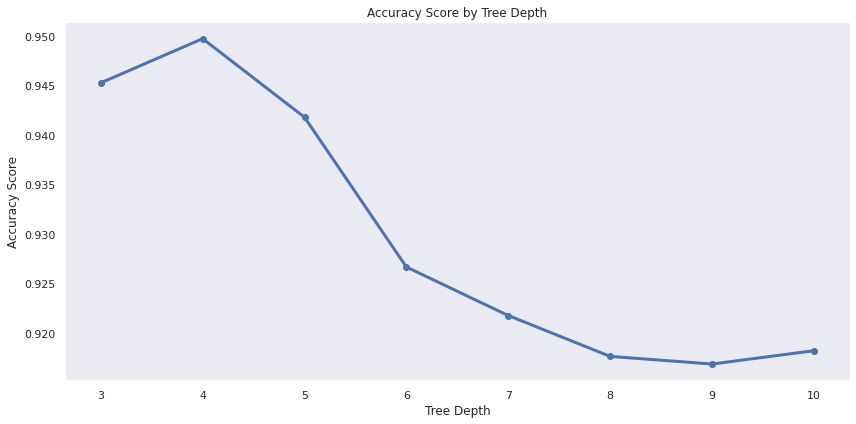

The best accuracy was 0.9497 with depth = 4.


In [13]:
n = 11
acc_tree = np.zeros((n-3))

for i in range(3, n):

    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)

    tree.fit(X_rus, y_rus)

    y_pred_tree = tree.predict(X_test)

    acc_tree[i-3] = accuracy_score(y_test, y_pred_tree)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(3, n), acc_tree, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Tree Depth')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Tree Depth')
ax.grid(False)

plt.tight_layout()
plt.show()

best_depth = acc_tree.argmax()+3
print(f'The best accuracy was {round(acc_tree.max(), 4)} with depth = {best_depth}.') 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85289
           1       0.03      0.87      0.06       154

    accuracy                           0.95     85443
   macro avg       0.52      0.91      0.52     85443
weighted avg       1.00      0.95      0.97     85443



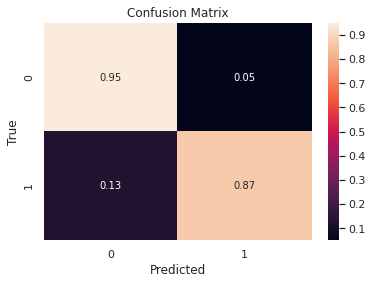

In [14]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

tree.fit(X_rus, y_rus)

y_pred_tree = tree.predict(X_test)

report(y_pred_tree)

We can actually see what the tree we created looks like. Let's do it.

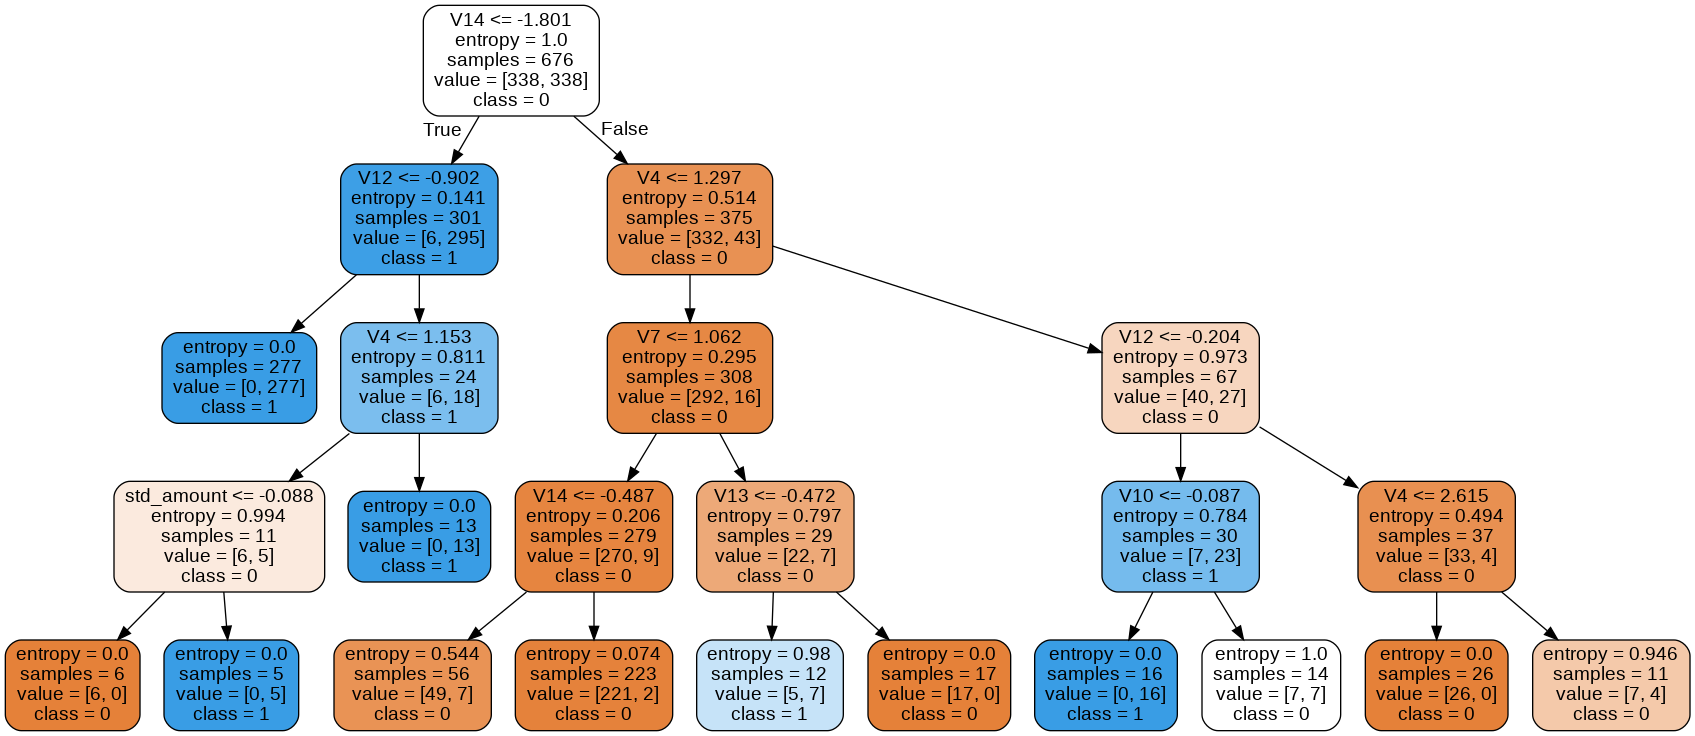

In [15]:
dot = export_graphviz(tree, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

##**K-nearest Neighbors**

[K-nearest Neighbors - KNN](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761) is a supervised machine learning algorithm that uses the distance of a new unlabeled entry from the others previously known labeled entries to predict the class of the new entry, as we can see in the image below.

![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png)

In the image, as the closest item to new item belongs to class A, then the new item we'll also be labeled as A. That's because the model in the image is using **k=1**, where **k** means the number of nearest neighbors to consider. As **k** increases, the algorithm will consider more close neighbors in order to classify the new example.

Just like the decision tree model, we need to set a value for **k**. We'll again train several models with different values for **k** and then use the best value in our final model.

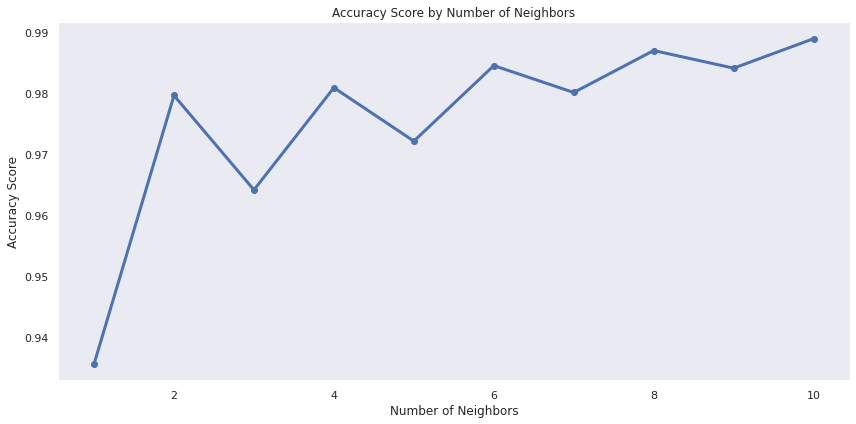

The best accuracy was 0.9889 with k = 10.


In [16]:
Ks = 11
acc_knn = np.zeros((Ks-1))

for k in range(1, Ks):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_rus, y_rus)

    y_pred_knn = knn.predict(X_test)

    acc_knn[k-1] = accuracy_score(y_test, y_pred_knn)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1, Ks), acc_knn, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Number of Neighbors')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Number of Neighbors')
ax.grid(False)

plt.tight_layout()
plt.show()

best_k = acc_knn.argmax()+1
print(f'The best accuracy was {round(acc_knn.max(), 4)} with k = {best_k}.') 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85289
           1       0.13      0.87      0.22       154

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.61     85443
weighted avg       1.00      0.99      0.99     85443



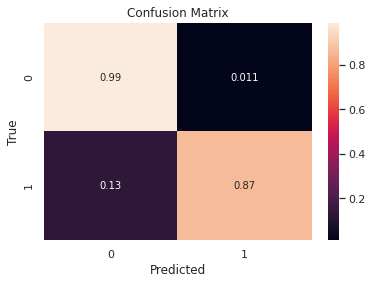

In [17]:
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_rus, y_rus)

y_pred_knn = knn.predict(X_test)

acc_knn[k-1] = accuracy_score(y_test, y_pred_knn)

report(y_pred_knn)

## **Comparing the Models**

We created three models based on three different algorithms to predict credit card frauds and evaluated each of them individually.

It is now time to compare these models. For this, a dataframe containing the score in each of the four previously introduced metrics for each of the models.

In [18]:
summary = pd.DataFrame(data={
                              'labels': ['Accuracy', 'Precision', 'Recall', 'F1_score'],
                              'logistic_regression': [accuracy_score(y_test, y_pred_log), precision_score(y_test, y_pred_log), recall_score(y_test, y_pred_log), f1_score(y_test, y_pred_log)],
                              'decision_trees': [accuracy_score(y_test, y_pred_tree), precision_score(y_test, y_pred_tree), recall_score(y_test, y_pred_tree), f1_score(y_test, y_pred_tree)],
                              'knn': [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn)]

}).set_index('labels')
summary.index.name = None

summary

,logistic_regression,decision_trees,knn
Accuracy,0.950037,0.949733,0.988940
Precision,0.032280,0.030392,0.126534
Recall,0.922078,0.870130,0.870130
F1_score,0.062376,0.058733,0.220940


# **Conclusion**

During his project, we worked with a complex real-world problem: credit card fraud. Although the data was clean, without any missing values and mostly transformed, we still had to go through some important steps in order to build predictive models. Such steps are:

* To explore the data;
* To normalize some of the columns
* To balance the dataset
* To create the models;
* To evaluate and compare the models.

As we reach the end of the project, it is reasonable to assume the result is satisfactory, since all three models present high accuracy scores. Of course, when working with complex problems there's always room for improvement of the models, but for now, this is it.

If you have any questions, suggestions, or feedback, feel free to contact me through GitHub or [Linkedin](https://www.linkedin.com/in/otavioss28/).

